In [1]:
import numpy as np
import pandas as pd

from numpy.linalg import norm

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML,display

from ast import literal_eval as make_tuple

%matplotlib inline

In [2]:
def ingest(data, nums):
    tmp = pd.read_csv(data, names = [i for i in range(nums)])
    tmp_sers = [tmp[i].dropna() for i in range(nums)]
    
    tmp_chkpoints = [ser[:ser[ser.str.contains('Score')].index[0]] for ser in tmp_sers]
    tmp_datas = [ser[ser[ser.str.contains('Score')].index[0]+1:] for ser in tmp_sers]
    return tmp_chkpoints, tmp_datas

chkpoints, datas = ingest('data/p1_com.csv', 5)

In [3]:
def make_arrays(sers):
    ret = [ser.apply(lambda x: np.array(make_tuple(x))) for ser in sers]
    return ret

chkpoints, datas = make_arrays(chkpoints), make_arrays(datas)

In [4]:
def refine(sers):
    ret = [ser[(ser.apply(lambda x: x[2]) >= 0) & (ser.apply(lambda x: x[2]) <= 600)].reset_index(drop=True) for ser in sers]
    return ret

chkpoints, datas = refine(chkpoints), refine(datas)

In [5]:
def find_distance(chkpoint, data):
    cur_chkpoint_idx = 0
    prv_chkpoint = data[0]
    cur_chkpoint = chkpoint[0]
    
    ser_list = []
    
    for point in data:
        if point[2] > cur_chkpoint[2]:
            cur_chkpoint_idx += 1
            if cur_chkpoint_idx > (len(chkpoint) - 1):
                break
            prv_chkpoint = chkpoint[cur_chkpoint_idx-1]
            cur_chkpoint = chkpoint[cur_chkpoint_idx]
#             print('current point=%s, current prev=%s, current=%s' % (point, prv_chkpoint, cur_chkpoint))
        d = norm(np.cross(cur_chkpoint - prv_chkpoint, prv_chkpoint - point)) / norm(cur_chkpoint - prv_chkpoint)
        ser_list.append(d)
        
    return pd.Series(ser_list)

In [6]:
result = [find_distance(chkpoints[i], datas[i]) for i in range(5)]

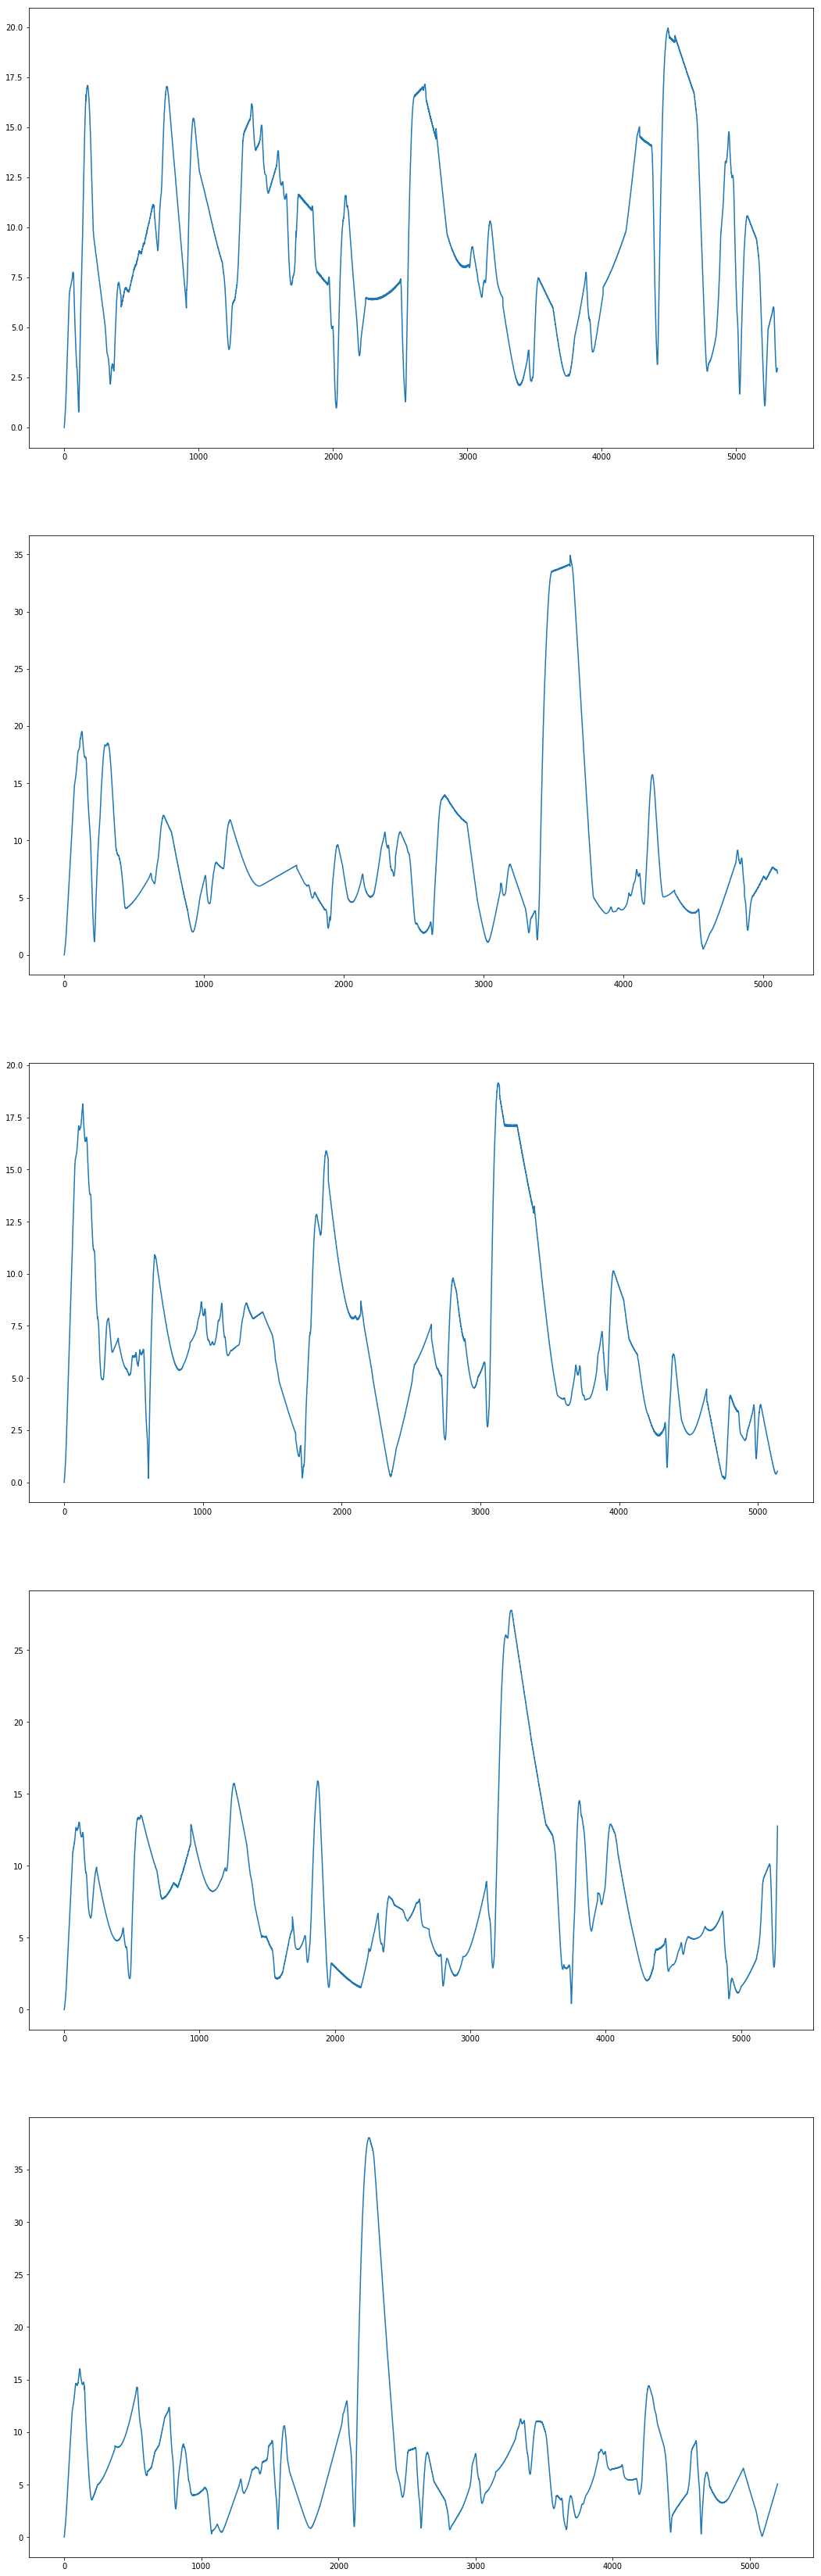

In [21]:
f, axes = plt.subplots(5, 1, figsize=(18, 60))
for i in range(len(result)):
    axes[i].plot(result[i])